
## 回家作業
- 請將資料清理乾淨以後，將資料存入資料庫 SQLite 之中,接者從SQLIte 取出資料後嘗試回答以下問題:

- 請使用pie 圖列出哪個縣市(city)的物件最多

- 請使用長條圖列出哪個縣市(city)的物件最多
- 請使用繪製每坪單價的直方圖
- 請使用繪製每坪單價的箱型圖
- 請使用繪製坪數與單價的散佈圖

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)

In [0]:
df['price'] = df['price'].map(lambda e: int(e.replace('元/月', '').replace(',','')))

In [11]:
s = '花蓮縣玉里鎮忠智路172號'
import re
m = re.match('(.+[市縣]).+', s)
m.group(1)

'花蓮縣'

In [12]:
s = '花蓮縣花蓮市林森路33號'
import re
m = re.match('(.+[市縣]).+', s)
m.group(1)

'花蓮縣花蓮市'

In [13]:
s = '花蓮縣花蓮市林森路33號'
import re
m = re.match('(.+?[市縣]).+', s)
m.group(1)

'花蓮縣'

In [0]:
# ? 放在一般字元後面 => {0,1}
# ? 放在+, *, ?後面 => 非貪婪比對

In [0]:
# (XX市)XX區XX路
# \u4e00-\u9fa5
#df['address'].str.extract('(.+?[市縣]).+')
df['city'] = df['address'].str.extract('([\u4e00-\u9fa5]+?[市縣]).+')

In [19]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,city
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,6.0,透天厝/獨立套房,22.878436,120.250810,高雄市
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,10.0,透天厝/獨立套房,25.081558,121.461868,新北市
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,新北市
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,5000,NaN,8.0,透天厝/獨立套房,22.551346,120.538032,屏東縣
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,5000,NaN,7.0,透天厝/分租套房,25.043652,121.141518,桃園市


In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as con:
  df.to_sql('rent591', con= con, if_exists='replace')

In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as con:
  df2 = pd.read_sql_query('select city, count(*) as city_cnt from rent591 group by city', con= con)

In [28]:
df2.set_index('city', drop=True, inplace=True)
df2.head()

,city_cnt
city,
南投縣,194
台中市,11754
台北市,17168
台南市,3964
台東縣,129


In [31]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-05-23 02:10:06--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  39.1MB/s    in 3.0s    

2020-05-23 02:10:10 (39.1 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [32]:
! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


In [0]:
!mv NotoSansCJKtc-Regular.otf /usr/share/fonts/truetype/

In [0]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf'
fontprop = fm.FontProperties(fname=path)

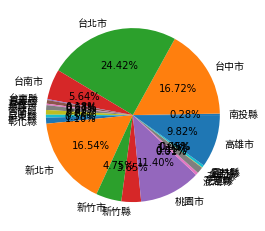

In [42]:
patches,l_text,p_text = plt.pie(df2['city_cnt'], labels=df2.index, autopct="%1.2f%%")
for t in l_text: 
	t.set_fontproperties(fontprop)

In [0]:
df2 = df2.sort_values('city_cnt', ascending = False)

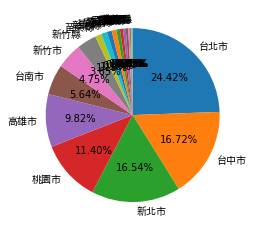

In [49]:
patches,l_text,p_text = plt.pie(df2['city_cnt'], labels=df2.index, autopct="%1.2f%%", startangle = 90, counterclock=False)
for t in l_text: 
	t.set_fontproperties(fontprop)

In [0]:
? plt.pie

In [56]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Pie(labels=df2.index, values=df2['city_cnt']))
fig.show()

([<matplotlib.axis.XTick at 0x7f72fbc65b38>,
 [Text(0, 0, '台北市'),
  Text(0, 0, '台中市'),
  Text(0, 0, '新北市'),
  Text(0, 0, '桃園市'),
  Text(0, 0, '高雄市'),
  Text(0, 0, '台南市'),
  Text(0, 0, '新竹市'),
  Text(0, 0, '新竹縣'),
  Text(0, 0, '苗栗縣'),
  Text(0, 0, '彰化縣'),
  Text(0, 0, '基隆市'),
  Text(0, 0, '宜蘭縣'),
  Text(0, 0, '嘉義市'),
  Text(0, 0, '屏東縣'),
  Text(0, 0, '花蓮縣'),
  Text(0, 0, '雲林縣'),
  Text(0, 0, '南投縣'),
  Text(0, 0, '嘉義縣'),
  Text(0, 0, '台東縣'),
  Text(0, 0, '金門縣'),
  Text(0, 0, '澎湖縣')])

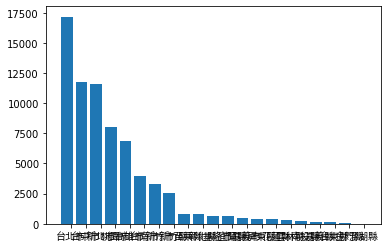

In [55]:
plt.bar(height = df2['city_cnt'], x=df2.index)
width = 0.3
x = range(len(df2.index))
plt.xticks([i+width for i in x],df2.index, fontproperties=fontprop)

In [58]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(x=df2.index, y=df2['city_cnt']))
fig.show()

In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as con:
  df3 = pd.read_sql_query("select building_area, price, price/building_area as price_per_area from rent591 where city = '台北市'", con= con)

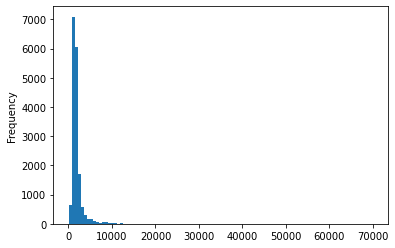

In [103]:
df3['price_per_area'].plot(kind='hist', bins = 100)

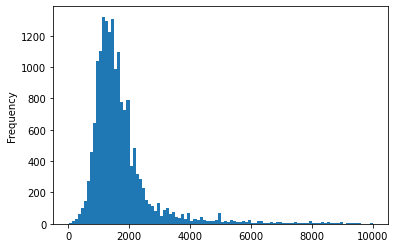

In [104]:
df3[df3['price_per_area'] < 10000]['price_per_area'].plot(kind='hist', bins = 100)

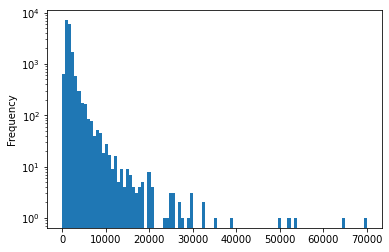

In [105]:
df3['price_per_area'].plot(kind='hist', logy=True, bins = 100)

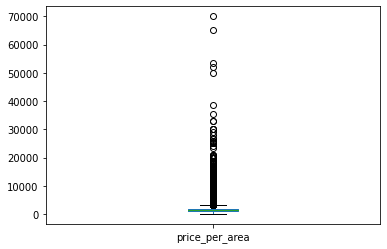

In [106]:
df3['price_per_area'].plot(kind='box')

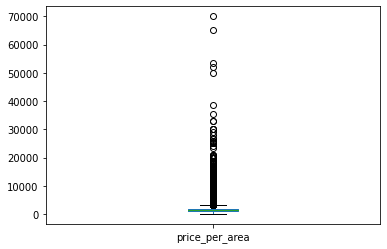

In [107]:
df3[df3['price_per_area'] < 100000]['price_per_area'].plot(kind='box')

In [108]:
df3.head()

,building_area,price,price_per_area
0,6.00,10000,1666.666667
1,78.00,25000,320.512821
2,66.35,70000,1055.011304
3,6.00,8000,1333.333333
4,26.00,14000,538.461538


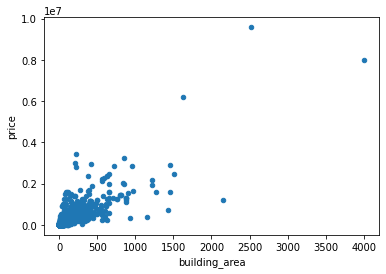

In [109]:
df3.plot(x = 'building_area', y = 'price', kind = 'scatter')

In [0]:
df3 = df3[df3['building_area'] <= 2000]

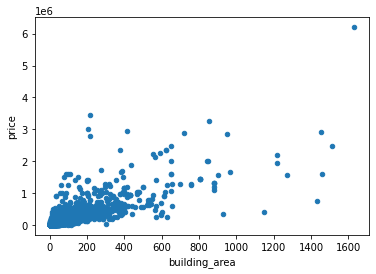

In [111]:
df3.plot(x = 'building_area', y = 'price', kind = 'scatter')

In [114]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(df3[['building_area']], df3['price'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predicted = clf.predict(df3[['building_area']])

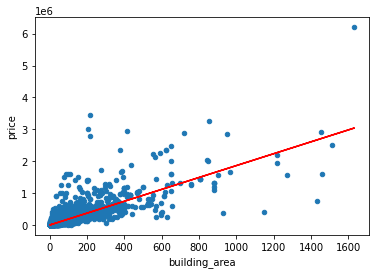

In [122]:
df3.plot(x = 'building_area', y = 'price', kind = 'scatter')
plt.plot(df3['building_area'], predicted, color = 'r')

In [124]:
import numpy
clf.predict(numpy.array([[20]]))

array([33137.72521324])